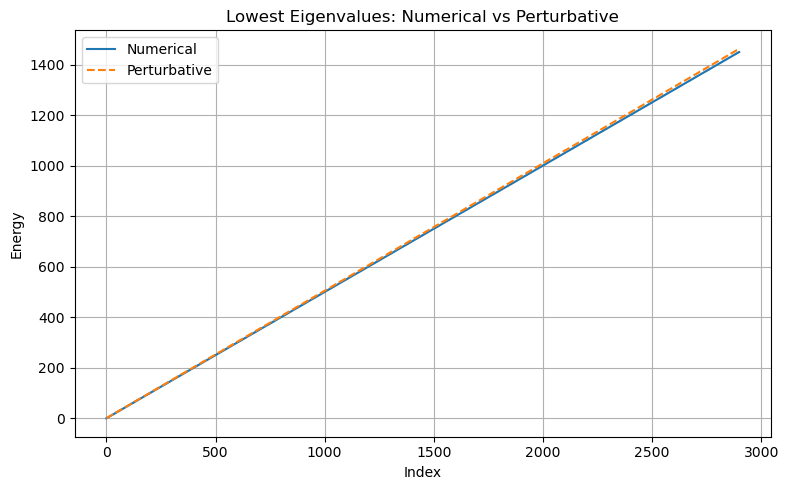

In [13]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Constants and parameters
N = 3000                   # Truncation of harmonic oscillator basis
m0 = 1.0                 # Mass for sector 0
m1 = 1.2                 # Mass for sector 1
omega = 1.0              # Oscillator frequency (used to define k)
alpha = 0.1              # Coupling strength
beta = 1.0               # Scalar prefactor
c = 1.0                  # Speed of light (set to 1 for simplicity)
g = 1.0                  # Gravitational acceleration

# Harmonic oscillator operators
def ho_operators(N):
    a = np.diag(np.sqrt(np.arange(1, N)), 1)
    adag = np.diag(np.sqrt(np.arange(1, N)), -1)
    x = (a + adag) / np.sqrt(2)
    p = 1j * (adag - a) / np.sqrt(2)
    return x, p

x, p = ho_operators(N)
I_ext = np.eye(N)
I_int = np.eye(2)

# Spring constant from omega
k0 = m0 * omega**2
k1 = m1 * omega**2

# Define h_0 and h_1 with gravitational potential and harmonic trap
h0 = (p @ p) / (2 * m0) + m0 * g * x + 0.5 * k0 * (x @ x)
h1 = (p @ p) / (2 * m1) + m1 * g * x + 0.5 * k1 * (x @ x)

# Define full Sigma_+ and Sigma_- operators (exact, no approximation)
Sigma_plus = 0.5 * beta * ((m0 + m1) * c**2 * I_ext + h0 + h1)
Sigma_minus = 0.5 * beta * ((m0 - m1) * c**2 * I_ext + h0 - h1)

# Build full internal operators
sigma_x = np.array([[0, 1], [1, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Build full Hamiltonian H_tilde
H_diag = np.kron(Sigma_plus, I_int) + np.kron(Sigma_minus, sigma_z)
H_offdiag = np.kron(alpha * x, sigma_x)
H_tilde = H_diag + H_offdiag

# Diagonalize
E_vals, E_vecs = la.eigh(H_tilde)

# Perturbative estimate of eigenvalues
x2_expect = np.diag(x @ x)  # ⟨n|x²|n⟩
Sigma_plus_diag = np.diag(Sigma_plus)
Sigma_minus_diag = np.diag(Sigma_minus)

pert_E_plus = Sigma_plus_diag + np.sqrt(Sigma_minus_diag**2 + (alpha**2) * x2_expect)
pert_E_minus = Sigma_plus_diag - np.sqrt(Sigma_minus_diag**2 + (alpha**2) * x2_expect)

# Sort and merge
pert_all = np.sort(np.concatenate([pert_E_plus, pert_E_minus]))

# Plot comparison
plt.figure(figsize=(8, 5))
plt.plot(E_vals[:2900], '-', label='Numerical')
plt.plot(pert_all[:2900], '--', label='Perturbative')
plt.title("Lowest Eigenvalues: Numerical vs Perturbative")
plt.xlabel("Index")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
